# Загрузка данных и первичный анализ

In [62]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [63]:
df = pd.read_csv("S05-hw-dataset.csv")

первые строки датасета (head())

In [64]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


информация о столбцах и типах (info())

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

базовые описательные статистики для числовых признаков (describe() или аналог)

In [66]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


распределение целевого признака default 

In [67]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

На основе первичного анализа можно сделать следующие выводы: датасет содержит 3000 объектов и 17 признаков. Пропусков нет, все значения корректны. Явных аномалий (например, отрицательного возраста) не наблюдается. checking_balance имеет минимальное значение –3000, но в описании датасета сказано, что этот параметр может быть отрицательным. Целевая переменная default не сбалансирована и имеет перевес в сторону класса 0: класс 0 составляет 59%, а класс 1 - 41%, однако этого может быть достаточно для корректного обучения бинарной классификации

# Подготовка признаков и таргета

Выделить матрицу признаков X и вектор таргета y

In [68]:
y = df["default"]
X = df.drop(columns=["client_id", "default"])
print("все признаки числовые" if all(pd.api.types.is_numeric_dtype(X[col]) for col in X.columns) else "не все признаки числовые")

все признаки числовые


# Train/Test-сплит и бейзлайн-модель

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

dummy_model = DummyClassifier(strategy="most_frequent", random_state=42) 
# DummyClassifier - простейшая модель, которая не обучается, а просто дает ответы на основе заданных правил
# most_frequent - всегда предсказывает наиболее часто встречающийся класс
dummy_model.fit(x_train, y_train)

baseline_y_pred = dummy_model.predict(x_test) # точные предсказания 
baseline_y_pred_proba = dummy_model.predict_proba(x_test)[:, 1]  # вероятности для класса 1

baseline_accuracy = accuracy_score(y_test, baseline_y_pred)
baseline_roc_auc = roc_auc_score(y_test, baseline_y_pred_proba)

print(f"DummyClassifier (most_frequent) результаты:")
print(f"Accuracy: {baseline_accuracy:.4f}") # точность (доля правильных ответов)
print(f"ROC-AUC:  {baseline_roc_auc:.4f}") # способность модели ранжировать положительные примеры выше отрицательных

DummyClassifier (most_frequent) результаты:
Accuracy: 0.5900
ROC-AUC:  0.5000


Бейзлайн задает минимальный порог качества, которого должна достичь модель. Далее проводится обучение модели и сравниваются метрики, и если они оказываются хуже или примерно такими же, значит модель не обучается и нужно что-то менять

# Логистическая регрессия и подбор гиперпараметров

In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])
print(pipe.get_params().keys())
grid_search = GridSearchCV(
    pipe,
    scoring="roc_auc",
    n_jobs=-1,
    param_grid={"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]} # подбор коэффициента силы регуляризации применяется только для модели лог. регрессии
)
grid_search.fit(x_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на CV: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
log_y_pred = best_model.predict(x_test)
log_y_pred_proba = best_model.predict_proba(x_test)[:, 1]

log_accuracy = accuracy_score(y_test, log_y_pred)
log_roc_auc = roc_auc_score(y_test, log_y_pred_proba)

print(f"Логистическая регрессия результаты:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"ROC-AUC:  {log_roc_auc:.4f}")


dict_keys(['memory', 'steps', 'verbose', 'scaler', 'logreg', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'logreg__C', 'logreg__class_weight', 'logreg__dual', 'logreg__fit_intercept', 'logreg__intercept_scaling', 'logreg__l1_ratio', 'logreg__max_iter', 'logreg__multi_class', 'logreg__n_jobs', 'logreg__penalty', 'logreg__random_state', 'logreg__solver', 'logreg__tol', 'logreg__verbose', 'logreg__warm_start'])
Лучшие параметры: {'logreg__C': 100.0}
Лучший ROC-AUC на CV: 0.8607
Логистическая регрессия результаты:
Accuracy: 0.8017
ROC-AUC:  0.8756


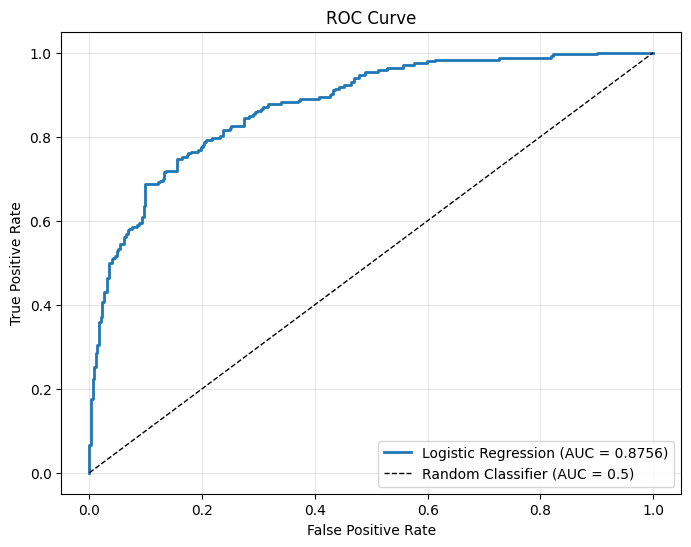

In [71]:
roc_auc = roc_auc_score(y_test, log_y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, log_y_pred_proba)
# TPR = TP / (TP + FN) — доля правильно классифицированных положительных примеров;
# FPR = FP / (FP + TN) — доля отрицательных примеров, неправильно классифицированных как положительные
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("figures/roc_curve.png", dpi=300, bbox_inches="tight")

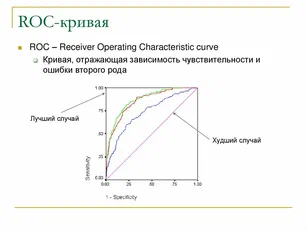

Вывод по графику: площадь под кривой значительно больше 0.5 (линии от [1, 0] до [0, 1]), и это подтверждает, что модель логической регрессии работает лучше случайного угадывания, что так же подтверждается полученными метриками

# Сравнение бейзлайна и логистической регрессии, текстовые выводы

In [72]:
results = pd.DataFrame({
    "Модель": ["DummyClassifier (most_frequent)", "LogisticRegression (best)"],
    "Accuracy": [baseline_accuracy, log_accuracy],
    "ROC-AUC": [baseline_roc_auc, log_roc_auc]
})

print(results.round(4))

                            Модель  Accuracy  ROC-AUC
0  DummyClassifier (most_frequent)    0.5900   0.5000
1        LogisticRegression (best)    0.8017   0.8756


Краткий текстовый отчет: Бейзлайн-модель использует сценарий most_frequent и всегда предсказывает наиболее популярный класс, и это дает результат 0,59 (59 процентов) точности, а так же 0,5 (50 процентов) ROC-AUC. Логистическая регрессия обучалась с различными гиперпараметрами, и после подробора лучшего значения достигла 0,80 (80 процентов) точности и 0,88 (88 процентов) ROC-AUC, что подтверждает успешное обучение. Таким образом, точность выросла на 0,21, а ROC-AUC на 0,38. При подборе гиперпараметров проверялось несколько вариантов C: 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, и лучший результат был достигнут при C = 100. Таким образом, логистическая регрессия является хорошим вариантом для решения поставленной задачи, так как демонстрирует высокие метрики, имея при этом высокую скорость обучения 